# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?

In [2]:
import pandas as pd
import numpy as np

mam = pd.read_csv('./data/mammogram.csv')
mam.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [3]:
a = pd.crosstab(mam["treatment"], mam['breast_cancer_death'])
a

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


> There is very little difference in the survival rates between the control and mammogram groups. The mamogram group saw 20 more people survice and 5 less people die, but both groups had a very large number of participants and thus the difference in the actual survival rate is very small.

In [4]:
control = 44405 / (44405+505)
mammogram = 44425 / (44425+500)
print("control survival rate:", control, 
      "mammogram survival rate:", mammogram)

control survival rate: 0.9887552883544868 mammogram survival rate: 0.9888703394546466


2. Bootstrap the densities and distributions of survival rates for the two groups.

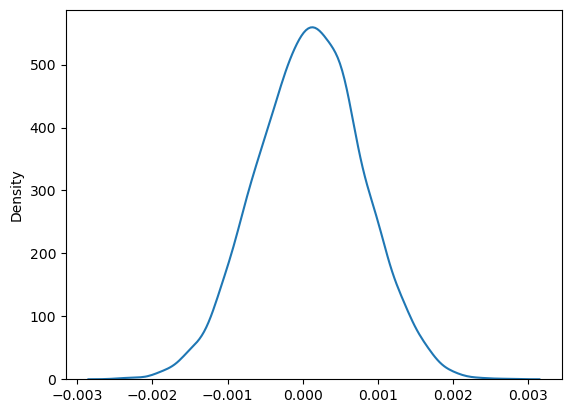

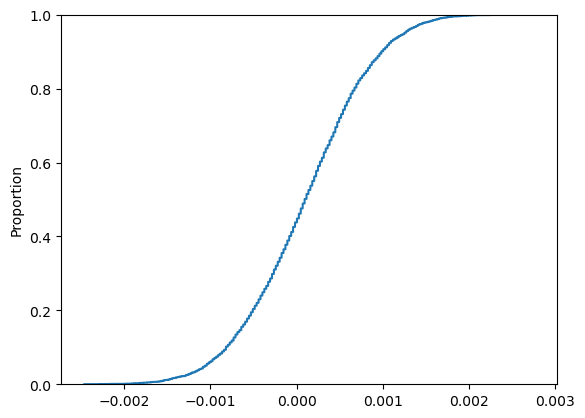

In [5]:
mam['survive'] = 0
mam.loc[ mam['breast_cancer_death'] == 'no', 'survive'] = 1

mam_treat = mam.loc[ mam['treatment'] == 'mammogram', :]
mam_control = mam.loc[ mam['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    mam_treat_t = mam_treat.sample( mam_treat.shape[0], axis=0, replace=True)
    mam_control_t = mam_control.sample( mam_control.shape[0], axis=0, replace=True)
    treatment_effect_t = np.mean(mam_treat_t['survive']) - np.mean(mam_control_t['survive'])
    fx.append(treatment_effect_t)

import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [44]:
print("lower:", np.quantile(fx, .001 ), "     upper:", np.quantile(fx, .999))

lower: -0.001978060591596873      upper: 0.0021856956725546128


>As shown by the lower bound being negative and the upper being positive, the 99% confidence interval does include zero.

4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

> This data might understate the conclusion that the mammogram's actually do help in the survival rate of cancer patients. This confidence interval includes 0 which means that the data says that getting a mammogram is not statistically signficant in the survival rates. This data might say that because the people in the study are people who are more consciousness of their health and are more healthy to begin with, thus skewing the results of our study into different treatments. Their past lives of living healthy or other factors might provide an extra boost in their survival rates that isn't just described by the two treatments. I would like to know more about the subjects of the study to see if they were chosen completely at random, if they were high risk, or had any other sort of characteristic that might obscure the real differences in the treatments. 

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

1. Cross tabulate `treatment` and `outcome`.

In [9]:
dia = pd.read_csv('./data/diabetes_hw.csv')
crosstab = pd.crosstab(dia["treatment"], dia['outcome'])
crosstab

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [11]:
lifestyle = 125 / (109+125)
met = 112 / (120+112)
rosi = 143 / (90+143)

print("lifestyle:", lifestyle, "    met:", met, "    rosi:", rosi)

lifestyle: 0.5341880341880342     met: 0.4827586206896552     rosi: 0.6137339055793991


> Rosi appears to be the most effective

3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?

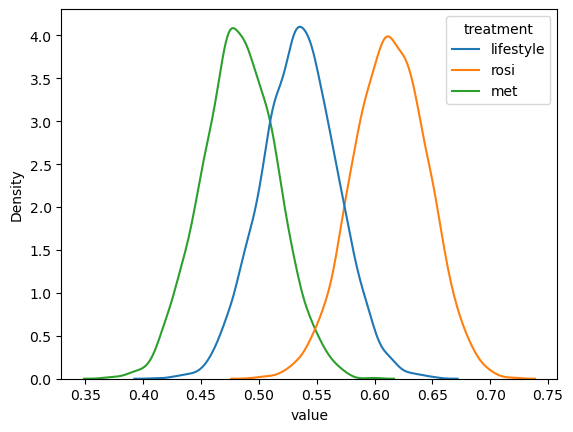

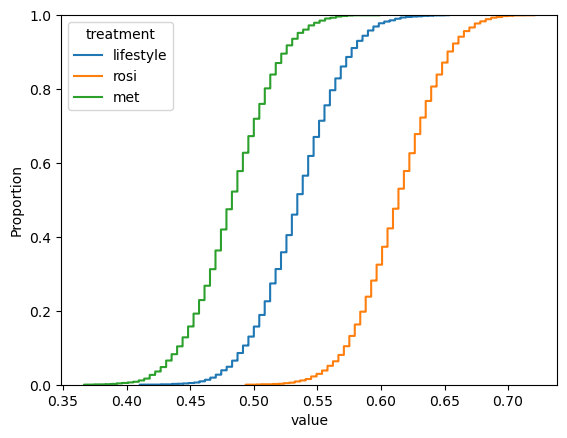

In [35]:
dia['success'] = 0
dia.loc[dia['outcome']=='success','success'] = 1

dia_lif = dia.loc[ dia['treatment'] == 'lifestyle', :]
dia_ros = dia.loc[ dia['treatment'] == 'rosi', :]
dia_met = dia.loc[ dia['treatment'] == 'met', :]

S = 5000
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    dia_lif_t = dia_lif.sample( dia_lif.shape[0], axis=0, replace=True)
    dia_ros_t = dia_ros.sample( dia_ros.shape[0], axis=0, replace=True)
    dia_met_t = dia_met.sample( dia_met.shape[0], axis=0, replace=True)
    fx_lif.append(np.mean((dia_lif_t['success'])))
    fx_ros.append(np.mean((dia_ros_t['success'])))
    fx_met.append(np.mean((dia_met_t['success'])))

lif = pd.DataFrame({'value':fx_lif, 'treatment':'lifestyle'}) 
ros = pd.DataFrame({'value':fx_ros, 'treatment':'rosi'})
met = pd.DataFrame({'value':fx_met, 'treatment':'met'})
total_fx = pd.concat([lif, ros, met], axis=0)
    
    
    
sns.kdeplot(total_fx, x='value', hue = 'treatment')
plt.show()

sns.ecdfplot(total_fx, x='value', hue = 'treatment')
plt.show()

>Rosi again appears to be more effective

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

lower: -0.008657530209254416     upper: 0.11155319776009431


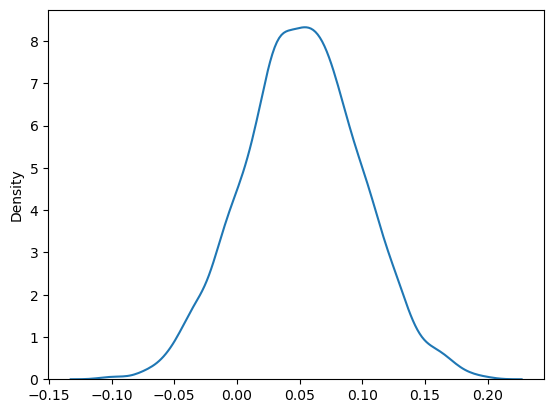

In [40]:
lif_vs_met = np.array(fx_lif) - np.array(fx_met)
sns.kdeplot(lif_vs_met)
print("lower:", np.quantile(lif_vs_met, .1), "    upper:", np.quantile(lif_vs_met, .9))

lower: -0.1869357703122687     upper: -0.0708709486458487


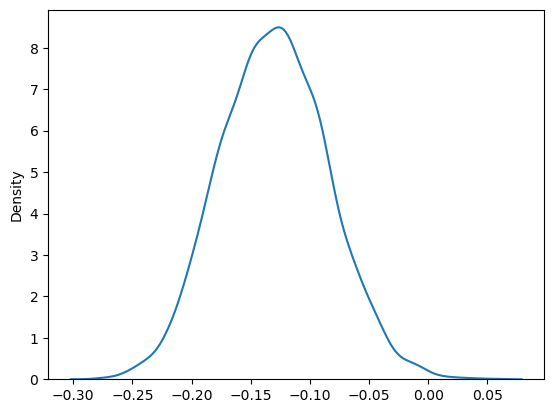

In [42]:
met_vs_ros = np.array(fx_met) - np.array(fx_ros)
sns.kdeplot(met_vs_ros)
print("lower:", np.quantile(met_vs_ros, .1), "    upper:", np.quantile(met_vs_ros, .9))

lower: 0.0195700818018415     upper: 0.135321521587616


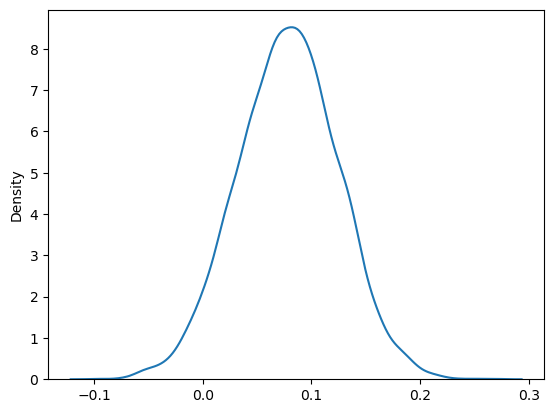

In [43]:
ros_vs_lif = np.array(fx_ros) - np.array(fx_lif)
sns.kdeplot(ros_vs_lif)
print("lower:", np.quantile(ros_vs_lif, .1), "    upper:", np.quantile(ros_vs_lif, .9))

Since neither the 90% confidence level of rosi vs. lifestle or met vs rosi includes 0, we can conclude that those comparisons are significantly significant. The comparison between lifestyle and met includes 0 and thus we can conclude that this comparison is not significantly significant. 

5. Which treatment appears to be the most effective overall?

From our study into the 90% confidence interval of the different tests, it appears that rosi is more effective than both lifestyle and met. This conclusion should not be too surprising as rosi's success rate was much larger than the other two treatments, and scored higher in our bootstraping of the effectiveness of each one. Finally with our comparison study, we now have statistical backing (with 90% confidence) that rosi is more effective than the other two.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?